100%|███████████████████████████████████████| 1001/1001 [00:15<00:00, 64.95it/s]


Standart: Elapsed time: 00:00:15


100%|███████████████████████████████████████| 1001/1001 [00:37<00:00, 26.68it/s]


Barnes-Hut: Elapsed time: 00:00:37


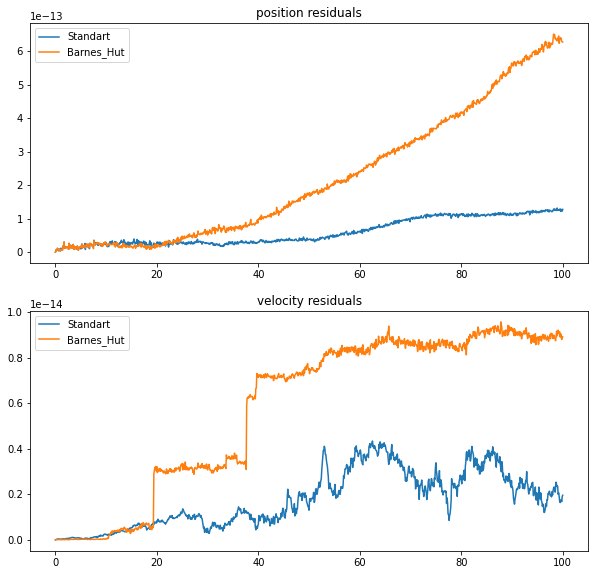

In [3]:
from experiments import Experiment

import sys
import time
import matplotlib.pyplot as plt

sys.setrecursionlimit(10**6) #for barnes hut

experiment = Experiment(seed=11)
pos_res_s, vel_res_s, ts, elap_time = experiment.run(method='standart',N=45, run_time=100, num_iterations=1000)
print('Standart: Elapsed time:', time.strftime('%H:%M:%S', time.gmtime(elap_time)))

f = plt.figure(figsize=(10,15))

ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312, sharex=ax1)

ax1.plot(ts, pos_res_s,label='Standart')
ax2.plot(ts, vel_res_s,label='Standart')

experiment = Experiment(seed=11)
pos_res, vel_res, ts, elap_time = experiment.run(method='Barnes-Hut',N=45, run_time=100, num_iterations=1000)
print('Barnes-Hut: Elapsed time:', time.strftime('%H:%M:%S', time.gmtime(elap_time)))

ax1.plot(ts, pos_res, label='Barnes_Hut')
ax2.plot(ts, vel_res, label='Barnes_Hut')

ax1.legend()
ax2.legend()
ax1.set_title('position residuals')
ax2.set_title('velocity residuals')
plt.show()

# VISUALIZATION

/tmp/ipykernel_36926/2907534989.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


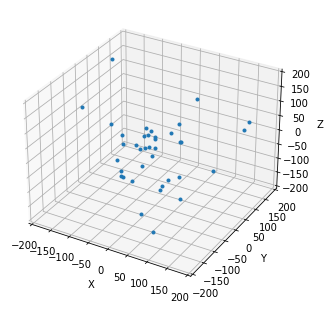

In [4]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

data = np.moveaxis(np.array(experiment.group.history), 0, 1)
# data: list of frames
# frame: list of dots
# dot: list of coordinates

fig = plt.figure()
ax = p3.Axes3D(fig)

h = ax.plot(*data[0].T, marker='.', linestyle='None')[0]

ax.set_xlim3d([-200.0, 200.0])
ax.set_xlabel('X')

ax.set_ylim3d([-200.0, 200.0])
ax.set_ylabel('Y')

ax.set_zlim3d([-200.0, 200.0])
ax.set_zlabel('Z')
#plt.show()

def update_particles(frame):
    # Plot the iterations up to num for all particles
    h.set_xdata(data[frame, :, 0].ravel())
    h.set_ydata(data[frame, :, 1].ravel())
    h.set_3d_properties(data[frame, :, 2].ravel())
    return h

anim = animation.FuncAnimation(fig, update_particles, frames=len(data), 
                                    interval=10)
HTML(anim.to_html5_video())

# Time test

In [ ]:
from experiments import Experiments

e = Experiments()
e.run_parallel(max_N=1000, max_iter=10)

1


100%|█████████████████████████████████████████| 101/101 [00:02<00:00, 46.21it/s]


112


100%|█████████████████████████████████████████| 101/101 [00:38<00:00,  2.62it/s]


223


 56%|███████████████████████▋                  | 57/101 [01:20<01:06,  1.51s/it]

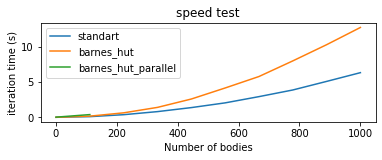

In [1]:
import pickle
import matplotlib.pyplot as plt
with open('res.pickle', 'rb') as handle:
    res = pickle.load(handle)
with open('res_parallel.pickle', 'rb') as handle:
    res_p = pickle.load(handle)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(res['Ns'], res['standart_times'], label='standart')
ax1.plot(res['Ns'], res['barneshut_times'], label='barnes_hut')
ax1.plot(res_p['Ns'], res_p['barneshut_times'], label='barnes_hut_parallel')
ax1.set_ylabel('iteration time (s)')
ax1.set_xlabel('Number of bodies')
ax1.set_title('speed test')
ax1.legend()
plt.show()

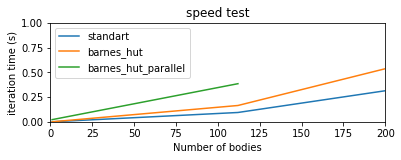

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(res['Ns'], res['standart_times'], label='standart')
ax1.plot(res['Ns'], res['barneshut_times'], label='barnes_hut')
ax1.plot(res_p['Ns'], res_p['barneshut_times'], label='barnes_hut_parallel')
ax1.set_ylabel('iteration time (s)')
ax1.set_xlabel('Number of bodies')
ax1.set_title('speed test')
ax1.set_xlim(0,200)
ax1.set_ylim(0,1)
ax1.legend()
plt.show()

# DEBUG